In [1]:
import numpy as np
import defs
import appynho

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_28D = defs.read_well('../data/7-MP-28D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])
well_31D = defs.read_well('../data/7-MP-31D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])
well_53D = defs.read_well('../data/7-MP-53D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])
well_56D = defs.read_well('../data/7-MP-56D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])

In [4]:
#calculating the DRDN log for all wells
# using the function "drdn" in the file "defs"
drdn_28D = defs.drdn(well_28D['RHOB'], well_28D['NPHI'])
well_28D['DRDN'] = drdn_28D
drdn_31D = defs.drdn(well_31D['RHOB'], well_31D['NPHI'])
well_31D['DRDN'] = drdn_31D
drdn_53D = defs.drdn(well_53D['RHOB'], well_53D['NPHI'])
well_53D['DRDN'] = drdn_53D
drdn_56D = defs.drdn(well_56D['RHOB'], well_56D['NPHI'])
well_56D['DRDN'] = drdn_56D

In [5]:
# calculating the lithology curve for all wells, using the DRDN log
# using the function "create_lithology" in the file "defs"
litho_28D = defs.create_lithology(drdn_28D)
well_28D['LITHOLOGY'] = litho_28D
litho_31D = defs.create_lithology(drdn_31D)
well_31D['LITHOLOGY'] = litho_31D
litho_53D = defs.create_lithology(drdn_53D)
well_53D['LITHOLOGY'] = litho_53D
litho_56D = defs.create_lithology(drdn_56D)
well_56D['LITHOLOGY'] = litho_56D

In [6]:
#setting top and base of the Maracangalha formation
top = 2500.00
base = 3100.00
step = 5.0
overlap = 0.10

In [7]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_28D = defs.formation_zone(well_28D, top, base)
formation_31D = defs.formation_zone(well_31D, top, base)
formation_53D = defs.formation_zone(well_53D, top, base)
formation_56D = defs.formation_zone(well_56D, top, base)

In [8]:
#creating curves that only contains one lithology type, for each lithology
#using the function "separate_lithology" in the file "defs"
separate_28D = defs.separate_lithology(formation_28D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])
separate_31D = defs.separate_lithology(formation_31D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])
separate_53D = defs.separate_lithology(formation_53D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])
separate_56D = defs.separate_lithology(formation_56D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])

In [9]:
statistic_28D = defs.statistic_lithology(separate_28D, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB'], step, top, base, overlap)
statistic_31D = defs.statistic_lithology(separate_31D, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB'], step, top, base, overlap)
statistic_53D = defs.statistic_lithology(separate_53D, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB'], step, top, base, overlap)

C:\Users\rmota\OneDrive\Documentos\PFG_2020\codes\defs.py:393: RuntimeWarning: Mean of empty slice
  m = np.nanmean(curve_save[w])
c:\programdata\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [10]:
statistic_28D

{'DEPTH': array([2500.122 , 2500.2744, 2500.4268, ..., 3099.6636, 3099.816 ,
        3099.9684]),
 'GR': array([ 82.9465,  85.1653,  97.942 , ...,  98.4511, 102.3324, 101.9913]),
 'NPHI': array([0.1985, 0.2366, 0.2627, ..., 0.3183, 0.2826, 0.2691]),
 'RHOB': array([2.6524, 2.6342, 2.6136, ..., 2.4002, 2.4042, 2.4056]),
 'DRDN': array([4.66466667, 5.57066667, 6.02866667, ..., 3.614     , 2.504     ,
        2.082     ]),
 'LITHOLOGY': array([57., 57., 57., ..., 57., 57., 57.]),
 'SANDSTONE': {'LITHOLOGY': array([nan, nan, nan, ..., nan, nan, nan]),
  'GR': {'Data': array([nan, nan, nan, ..., nan, nan, nan]),
   'Mean': {'Top': [2500.0,
     2504.5,
     2509.0,
     2513.5,
     2518.0,
     2522.5,
     2527.0,
     2531.5,
     2536.0,
     2540.5,
     2545.0,
     2549.5,
     2554.0,
     2558.5,
     2563.0,
     2567.5,
     2572.0,
     2576.5,
     2581.0,
     2585.5,
     2590.0,
     2594.5,
     2599.0,
     2603.5,
     2608.0,
     2612.5,
     2617.0,
     2621.5,
     2

In [11]:
means = np.array(statistic_28D['SANDSTONE']['GR']['Mean']['Value'])
print(means)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 38.1904     33.41115714 33.415      43.23195714         nan 40.04728889
 40.08938947 38.18346667         nan 36.95474091 38.61755217         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 48.98353333 41.49384118 34.11011562 38.69168333
 47.0198             nan         nan         nan 39.86543    38.81675714
 36.40973333         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 54.8379     48.03413913 51.33544444 45.14420417
 44.60288333 45.13514583 55.5080875  56.1962     58.40272273 54.78236897
 55.71015455 50.55411739 52.19217586 52.12555    49.55958    58.0973
 49.46051429 51.48012    57.92775    55.30045    57.155

In [12]:
means2 = np.array(statistic_31D['SANDSTONE']['GR']['Mean']['Value'])
print(means2)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 43.15488333 39.07459355 43.02443125 45.3494875
 59.75809286 49.34732632 49.87484074 49.87017931 51.05955    53.74566786
 57.35177143 57.9649871  58.24691429 50.57666296 52.84297143 51.69545
 61.24429474 55.84238261 58.74508    51.92120476 51.5601125  55.60186667
 53.20356667 59.68733913 54.49707857 48.651956   54.00809167 59.814568
 57.53685172 53.10638065 51.66923462 53.19990714 55.66508095 61.85940667
 58.87591667 54.24515    50.83310333 52.44459259 56.11827

In [13]:
means3 = np.array(statistic_53D['SANDSTONE']['GR']['Mean']['Value'])
print(means3)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 51.3391     52.19212143 40.06151    43.13396078
 53.23830784 55.52683529 52.73846304 47.24065098 47.9802     55.84731622
 54.51055682 58.9067549  58.38500417 66.42275556 50.29950196 53.79898
 56.40762593 57.48460196 57.03720455 66.68324211 62.106695   64.21775152
 60.82996429 65.19415926 62.42513125 64.92349459 55.31705098 63.03463415
 59.6820186  64.84768537 64.36937407 58.92394681 60.16292174 52.3453
 59.16193721 55.80233636 62.62281569 63.81885227 54.47756875 59.28053913
 59.21551    54.53358537 44.11101429 49.1166625  64.85156667 51.84823684
 56.62812    53.17013333 62.29169063 63.417375   59.03839565 58.9971
 56.86880455 57.62734792 57.21987059 61.68448966 70.24303125 6

In [14]:
nans = np.array(list(map(np.isnan, means)))

In [15]:
print(nans)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False  True False
 False False  True False False  True  True  True  True  True  True  True
  True  True False False False False False  True  True  True False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False  True  True  True  True  True  True  True  True  True  True
  True]


In [16]:
means[nans] = means2[nans]
means

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, 38.1904    , 33.41115714,
       33.415     , 43.23195714,         nan, 40.04728889, 40.08938947,
       38.18346667,         nan, 36.95474091, 38.61755217,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, 48.98353333, 41.49384118,
       34.11011562, 38.69168333, 47.0198    ,         nan, 43.15488333,
       39.07459355, 39.86543   , 38.81675714, 36.40973333, 49.34732632,
       49.87484074, 49.87017931, 51.05955   , 53.74566786, 57.35177143,
       57.9649871 , 58.24691429, 50.57666296, 52.84297143, 51.69545   ,
       61.24429474, 55.84238261, 54.8379    , 48.03413913, 51.33544444,
       45.14420417, 44.60288333, 45.13514583, 55.5080875 , 56.19

In [17]:
nans = np.array(list(map(np.isnan, means)))
nans

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,

In [18]:
means[nans] = means3[nans]
means

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, 38.1904    , 33.41115714,
       33.415     , 43.23195714,         nan, 40.04728889, 40.08938947,
       38.18346667, 51.3391    , 36.95474091, 38.61755217, 43.13396078,
       53.23830784, 55.52683529, 52.73846304, 47.24065098, 47.9802    ,
       55.84731622, 54.51055682, 58.9067549 , 48.98353333, 41.49384118,
       34.11011562, 38.69168333, 47.0198    , 57.48460196, 43.15488333,
       39.07459355, 39.86543   , 38.81675714, 36.40973333, 49.34732632,
       49.87484074, 49.87017931, 51.05955   , 53.74566786, 57.35177143,
       57.9649871 , 58.24691429, 50.57666296, 52.84297143, 51.69545   ,
       61.24429474, 55.84238261, 54.8379    , 48.03413913, 51.33544444,
       45.14420417, 44.60288333, 45.13514583, 55.5080875 , 56.19

In [19]:
def create_database(statistics, lithology, curve):
    means = []
    stds = []
    for well in statistics:
        means.append(np.array(well[lithology][curve]['Mean']['Value']))
        stds.append(np.array(well[lithology][curve]['Std']['Value']))
        
    m = means[0]
    s = stds[0]
    for mean, std in zip(means[1:], stds[1:]):
        nans = np.array(list(map(np.isnan, m)))
        m[nans] = mean[nans]
        s[nans] = std[nans]
    
    return [list(m), list(s)]

In [20]:
tops = statistic_28D['SANDSTONE']['GR']['Mean']['Top']
bases = statistic_28D['SANDSTONE']['GR']['Mean']['Base']

In [21]:
lithology = ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE']
database = {}
for lith in lithology:
    database[lith] = {}
    database[lith]['GR'] = {}
    database[lith]['GR']['Mean'] = {}
    database[lith]['GR']['Std'] = {}
    database[lith]['GR']['Mean']['Top'] = tops
    database[lith]['GR']['Mean']['Base'] = bases
    database[lith]['GR']['Mean']['Value'] = create_database([statistic_28D, statistic_31D, statistic_53D], lith, 'GR')[0]
    database[lith]['GR']['Std']['Top'] = top
    database[lith]['GR']['Std']['Base'] = base
    database[lith]['GR']['Std']['Value'] = create_database([statistic_28D, statistic_31D, statistic_53D], lith, 'GR')[1]

In [22]:
database

{'SANDSTONE': {'GR': {'Mean': {'Top': [2500.0,
     2504.5,
     2509.0,
     2513.5,
     2518.0,
     2522.5,
     2527.0,
     2531.5,
     2536.0,
     2540.5,
     2545.0,
     2549.5,
     2554.0,
     2558.5,
     2563.0,
     2567.5,
     2572.0,
     2576.5,
     2581.0,
     2585.5,
     2590.0,
     2594.5,
     2599.0,
     2603.5,
     2608.0,
     2612.5,
     2617.0,
     2621.5,
     2626.0,
     2630.5,
     2635.0,
     2639.5,
     2644.0,
     2648.5,
     2653.0,
     2657.5,
     2662.0,
     2666.5,
     2671.0,
     2675.5,
     2680.0,
     2684.5,
     2689.0,
     2693.5,
     2698.0,
     2702.5,
     2707.0,
     2711.5,
     2716.0,
     2720.5,
     2725.0,
     2729.5,
     2734.0,
     2738.5,
     2743.0,
     2747.5,
     2752.0,
     2756.5,
     2761.0,
     2765.5,
     2770.0,
     2774.5,
     2779.0,
     2783.5,
     2788.0,
     2792.5,
     2797.0,
     2801.5,
     2806.0,
     2810.5,
     2815.0,
     2819.5,
     2824.0,
     2828.5,
    

In [23]:
gr_sort_56D = defs.sort_curve(separate_56D, database, litho_types, 'GR', step, top, base)

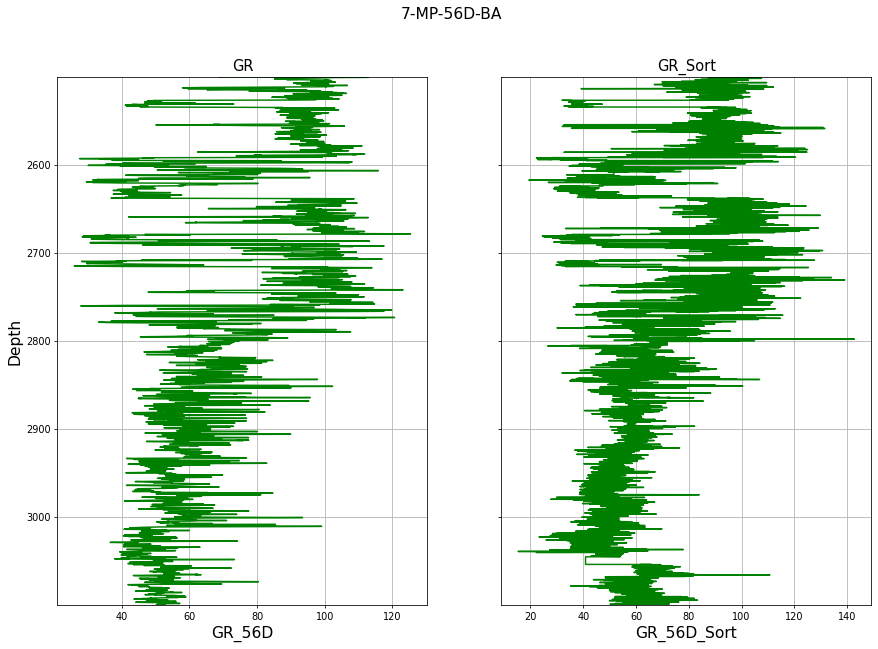

In [24]:
grafico = appynho.plotagem(2, titulo = '7-MP-56D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_56D['GR'], separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR_56D', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, gr_sort_56D, separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR_56D_Sort', descricao_y = 'Depth', titulo = 'GR_Sort')

In [25]:
w = (statistic_28D['DEPTH'] >= 3040.0) & (statistic_28D['DEPTH'] < 3090.0)

In [26]:
std = np.nanstd(statistic_28D['SANDSTONE']['GR']['Data'][w])
std

0.0

In [27]:
statistic_28D['SANDSTONE']['GR']['Data'][w]

array([    nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan, 40.8871,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     

In [28]:
gr_res = separate_56D['GR'] - gr_sort_56D

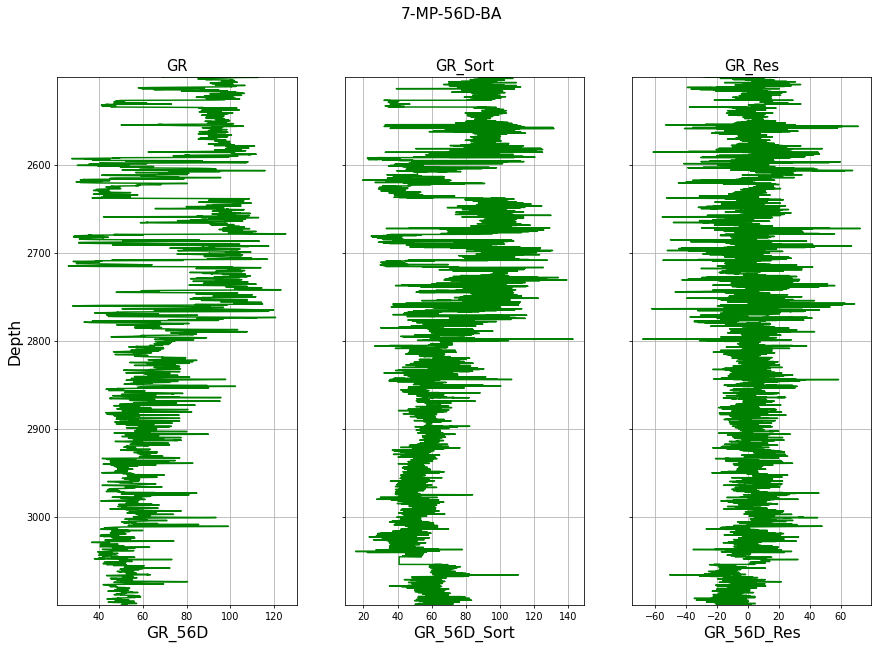

In [30]:
grafico = appynho.plotagem(3, titulo = '7-MP-56D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_56D['GR'], separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR_56D', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, gr_sort_56D, separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR_56D_Sort', descricao_y = 'Depth', titulo = 'GR_Sort')
grafico.plot_s(2, gr_res, separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR_56D_Res', descricao_y = 'Depth', titulo = 'GR_Res')